## Installing Required Packages

In [2]:
# !pip install gensim
# !pip install pandas
# !pip install nltk
# !pip install matplotlib
# !pip install seaborn
# !pip install charset-normalizer
# !pip install scikit-learn

* **gensim**: a library for topic modelling, document indexing, and similarity retrieval with large corpora.
* **pandas**: a library for data manipulation and analysis. It provides easy-to-use data structures and data analysis tools.
* **nltk**: the Natural Language Toolkit is a library for NLP in Python. It provides tools for text processing, tokenization, parsing, semantic reasoning, and machine learning.
* **matplotlib**: a plotting library for Python that allows you to create a wide variety of static, animated, and interactive visualizations in Python.
* **seaborn**: a data visualization library built on top of matplotlib. It provides a high-level interface for creating informative and attractive statistical graphics.
* **charset-normalizer**: a library for character set detection and normalization. It helps to deal with different character encodings and ensures that text is properly encoded before further processing.
* **scikit-learn**: a machine learning library for Python. It provides tools for data preprocessing, feature selection, model selection, and evaluation, as well as a wide range of machine learning algorithms.

## Importing Required Packages

In [1]:
# Data Preprocessing Libraries:
import random
import numpy as np
import pandas as pd
import charset_normalizer
import string
from sklearn.preprocessing import OrdinalEncoder
# Text Preprocessing Libraries:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from gensim import corpora, models
# Model Building and Training Libraries:
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# Data Visualization Libraries:
import seaborn as sns
import matplotlib.pyplot as plt


### Data Preprocessing Libraries:

* **numpy**: This library provides support for large, multi-dimensional arrays and matrices, as well as a large collection of mathematical functions. We will use it to handle our data in the form of arrays.
* **pandas**: This library is used for data manipulation and analysis. We will use it to load our data into the notebook.
* **charset_normalizer**: This library is used for character set detection and normalization. We will use it to ensure that our text data is properly encoded before further processing.
* **string**: This library provides a collection of useful string operations that we will use during text preprocessing.
* **OrdinalEncoder**: This package provides a function that we will use to encode categorical features.

### Text Preprocessing Libraries:

* **nltk**: This library is the Natural Language Toolkit for Python. It provides tools for text processing, tokenization, parsing, semantic reasoning, and machine learning. We will use the following sub-packages from nltk:
    * **stopwords**: This package provides a list of commonly occurring stop words that we will remove from our text data during preprocessing.
    * **word_tokenize**: This package provides a tokenizer that we will use to tokenize our text data.
    * **WordNetLemmatizer**: This package provides a lemmatizer that we will use to convert words to their base forms.
* **gensim**: This library provides tools for topic modelling, document indexing, and similarity retrieval with large corpora. We will use it for feature extraction.

### Model Building and Training Libraries:

* **sklearn**: This library provides tools for data preprocessing, feature selection, model selection, and evaluation, as well as a wide range of machine learning algorithms. We will use the following sub-packages from sklearn:
    * **LogisticRegression**: This package provides a logistic regression algorithm that we will use for classification.
    * **train_test_split**: This package provides a function that we will use to split our data into training and testing sets.
    * **accuracy_score**: This package provides a metric that we will use to evaluate the performance of our model.
    * **confusion_matrix**: This package provides a metric that we will use to evaluate the performance of our model.

### Data Visualization Libraries:

* **seaborn**: This library is a data visualization library built on top of matplotlib. It provides a high-level interface for creating informative and attractive statistical graphics.
* **matplotlib.pyplot**: This library is a plotting library for Python that allows you to create a wide variety of static, animated, and interactive visualizations in Python. We will use it to visualize our data and results.

### Downloading NLTK Resources

In [ ]:
# Downloading NLTK Resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

* **punkt**: a tokenizer that divides text into a list of sentences or words.
* **stopwords**: a list of commonly used words in a language that are often removed from text because they don't provide much meaning, such as "the", "a", "an", "and", "in", "on", etc.
* **wordnet**: a lexical database for the English language that provides a hierarchy of word senses, synonyms, and antonyms. It is often used for tasks such as word sense disambiguation, semantic similarity, and text classification.

## Loading Data

In [5]:
# Define the path to the CSV file
dataset = "./data.csv"
# Use charset_normalizer to detect the character encoding of the CSV file
with open(dataset, "rb") as csv:
    encoding = charset_normalizer.detect(csv.read(250000))
    print("Detected encoding "+encoding['encoding']+" with confidence level of "+str(encoding['confidence']))
# Read in the CSV file as a Pandas DataFrame using the detected encoding
df = pd.read_csv(dataset, encoding=encoding["encoding"],sep='\t')

Detected encoding utf-8 with confidence level of 1.0


In [6]:
df.head()

,classe,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   classe   5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


The output shows that the dataframe has 5572 observations and 2 columns. The column names are "classe" and "message". Both columns contain text data.

The output also shows that there are no missing values in the dataframe.

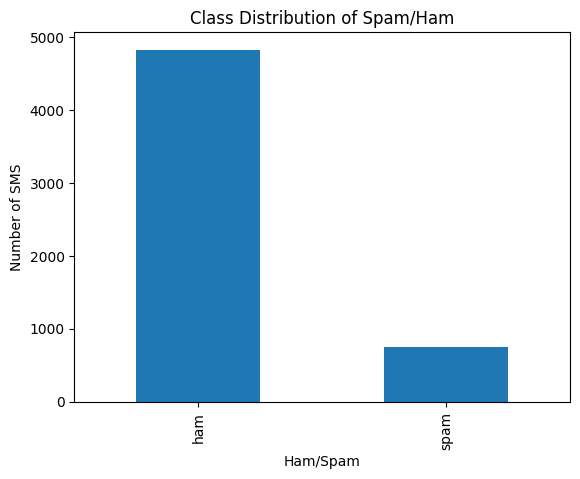

In [8]:
df["classe"].value_counts().plot(
    title="Class Distribution of Spam/Ham",
    kind="bar",
    xlabel="Ham/Spam",
    ylabel="Number of SMS",
)
plt.show()

## Data preprocessing

In [9]:
# Label Encoding
ordinal_encoder = OrdinalEncoder()
df["classe"] = ordinal_encoder.fit_transform(df[["classe"]])

In [10]:
df.head()

,classe,message
0,0.0,"Go until jurong point, crazy.. Available only ..."
1,0.0,Ok lar... Joking wif u oni...
2,1.0,Free entry in 2 a wkly comp to win FA Cup fina...
3,0.0,U dun say so early hor... U c already then say...
4,0.0,"Nah I don't think he goes to usf, he lives aro..."


### Tokenization

In [11]:
corpus = df['message'].values.tolist()
# Loop through the 'message' column and tokenize each text object
tokens = []
for document in corpus:
    document_str = str(document)  # Convert text object to string
    # Remove punctuations from the document
    no_punct = document_str.translate(str.maketrans("", "", string.punctuation))
    tokenized_text = word_tokenize(no_punct)  # Tokenize the text
    tokens.extend(tokenized_text)
tokens = list(set(tokens))

The code extracts the text data from the "**message**" column of the dataframe and converts it into a list called "**corpus**".

Next, the code uses the *nltk* library to tokenize each text object in the "**corpus**" list. 

**Tokenization** is the process of splitting a text into individual words or tokens.

The code loops through each text object in the "**corpus**" list and performs the following steps:

* Converts the text object to a string.
* Removes all punctuation from the string.
* Tokenizes the cleaned string.
* Extends the "**tokens**" list with the tokenized text.

### Stopwords removal

In [12]:
# Stopwords removal
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if not word.lower() in stop_words]

Creating a set of stop words from the "**english**" language using *stopwords.words('english')*.

Next, use a list comprehension to create a new list called "**tokens**" containing all tokens from the previous code cell that are not stop words.

### Lemmatization

In [13]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
tokens = [lemmatizer.lemmatize(word) for word in tokens]

**Lemmatization** is the process of reducing words to their base or root form, called a lemma, which can help reduce the sparsity of the text data and improve the performance of machine learning models.

The **lemmatization** step is often performed after **stop words removal** because stop words do not have a clear base form and can be removed without the need for lemmatization.

### Creating the Bag of Words Model

The bag of words model is a way of representing text data as a vector of word frequencies, where each element in the vector represents a single word and the value of the element represents the frequency of that word in the document.

In [14]:
wholeData = []
# Create the Bag of Words model
for idx, doc in enumerate(df["message"]):
    bagOfwords = []
    text = lemmatizer.lemmatize(doc.lower())
    for word in tokens:
        bagOfwords.append(1) if word in text else bagOfwords.append(0)
    wholeData.append([bagOfwords, [df.loc[idx, 'classe']]])


For each word in the list of tokens, the code checks if the word is present in the lemmatized text using an if statement. If the word is present, the code appends a 1 to the "**bagOfwords**" list, indicating that the word appears in the document. If the word is not present, the code appends a 0 to the list, indicating that the word does not appear in the document.

### Preparing the Data for Model Training

In [15]:
random.shuffle(wholeData)
wholeData = np.array(wholeData, dtype=object) # coverting our data into an array after shuffling
x = np.array(list(wholeData[:, 0]))
y = np.array(list(wholeData[:, 1]))

Shuffle the "**wholeData**" list to ensure that the data is not biased in any particular order.

Convert the shuffled "**wholeData**" list into a numpy array. This is because each element of "wholeData" is a list containing another list (the bag of words representation) and a class label.

Create two new numpy arrays "x" and "y", which will be used as inputs and targets for model training respectively.

## Model Training and Evaluation

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.30, shuffle=True, stratify=y, random_state=40
)
# train a Logistic Regression Model
clf = LogisticRegression()
clf.fit(X_train, y_train)

In [24]:
# evaluate the classifier on the test set
y_pred = clf.predict(X_test)

Accuracy: 0.9916267942583732
Confusion Matrix: [[1445    3]
 [  11  213]]


<Axes: >

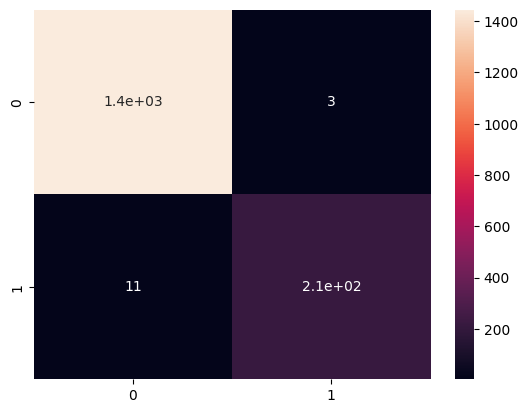

In [26]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:",cm)
sns.heatmap(cm, annot=True)

In the output, we have two classes: 0 and 1. The model has predicted the class for 1672 samples in the test dataset. Out of these, 1445 samples belong to class 0 and the model has correctly predicted them as class 0 (True Negatives). The model has predicted 3 samples as class 0, but they actually belong to class 1 (False Negatives). The model has predicted 11 samples as class 1, but they actually belong to class 0 (False Positives). Finally, the model has predicted 213 samples as class 1 and they actually belong to class 1 (True Positives).

In [27]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1448
         1.0       0.99      0.95      0.97       224

    accuracy                           0.99      1672
   macro avg       0.99      0.97      0.98      1672
weighted avg       0.99      0.99      0.99      1672



* **Precision**: it measures how many of the messages we classified as spam were actually spam. For class 0 (not spam), the precision is 0.99, which means 99% of the messages that were classified as not spam were indeed not spam. For class 1 (spam), the precision is 0.99, which means 99% of the messages that were classified as spam were actually spam.

* **Recall**: it measures how many of the actual spam messages were correctly classified as spam. For class 0, the recall is 1.0, which means 100% of the actual not spam messages were correctly classified as not spam. For class 1, the recall is 0.95, which means 95% of the actual spam messages were correctly classified as spam.

* **F1-score**: it is the harmonic mean of precision and recall, which gives a single score that represents both metrics. For class 0, the F1-score is 1.0, and for class 1, it is 0.97.

* **Support**: it is the number of samples in each class in the test data. There are 1448 samples of class 0 and 224 samples of class 1.

* **Accuracy**: it is the percentage of correctly classified samples. In our case, the accuracy is 0.99, which means 99% of the samples in the test data were correctly classified.

* **Macro Avg**: it is the arithmetic average of precision, recall, and F1-score across all classes.

* **Weighted Avg**: it is the weighted average of precision, recall, and F1-score across all classes, weighted by the number of samples in each class.